<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/new0_tf_02_03_mnist_cnn_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***실습 2-3 :  tf.keras 모듈을 이용해 CNN(Convolution Neural Network) 설계하기*** 


- *이미지 분류(Image Classification)를 위한 뉴럴 네트워크를 CNN으로 설계한다*
- *NN 모델을 훈련시킨다*
- *NN 모델의 정확도를 검증한다*

## ***Module Import***

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)
print (keras.__version__)

2.0.0
2.2.4-tf


## ***DataSet***

### *Load*

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print (x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


### *Preview*

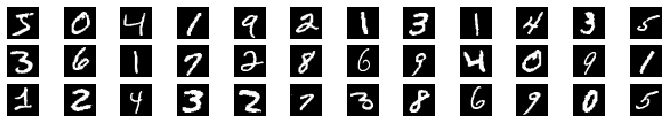

In [4]:
plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [5]:
# add a channel dimension
x_train = x_train[..., tf.newaxis]
print (x_train.shape)
x_test = x_test[..., tf.newaxis]

(60000, 28, 28, 1)


## ***Model***

### *Define*

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1), name='conv_32'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', name='conv_64'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu', name='conv_128'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

  tf.keras.layers.Flatten(name='flatten'),
  tf.keras.layers.Dense(256, activation='relu',name='dense_256'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_10')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_32 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv_64 (Conv2D)             (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv_128 (Conv2D)            (None, 7, 7, 128)         7

### *Compile*

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

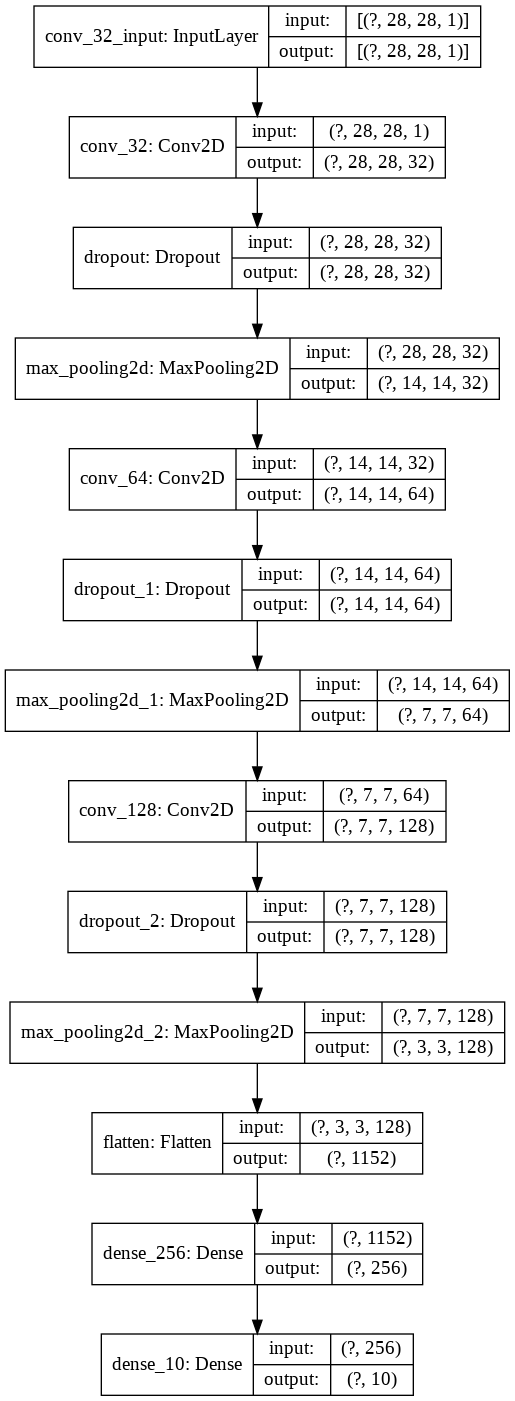

In [8]:
tf.keras.utils.plot_model(model, 'my_cnn_model.png', show_shapes=True)

### *Fit*

Epoch 10/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0273 - accuracy: 0.9913
CPU times: user 35.8 s, sys: 15.6 s, total: 51.4 s   
Wall time: 53.9 s (@Notebook Setting/GPU)

In [9]:
%%time
hist = model.fit(x_train, y_train, batch_size=1000, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5705 - accuracy: 0.8349
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1153 - accuracy: 0.9641
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0758 - accuracy: 0.9763
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0604 - accuracy: 0.9811
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0509 - accuracy: 0.9841
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0445 - accuracy: 0.9862
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0383 - accuracy: 0.9881
Epoch 8/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0339 - accuracy: 0.9897
Epoch 9/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0320 - accuracy: 0.9902
Epoch 10/10
6

### *Evaluate*

In [10]:
model.evaluate(x_test,  y_test, verbose=0)

[0.04072031633593142, 0.9909]

## ***Analysis***

### *Plot*

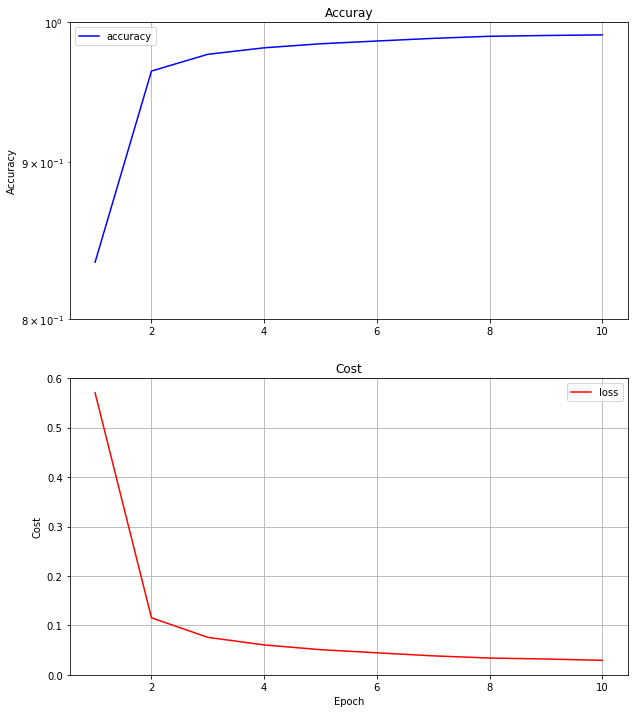

In [11]:
history_dict = hist.history
history_dict.keys()

loss = history_dict['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.semilogy(epochs, hist.history['accuracy'], 'b', label='accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Cost')
plt.plot(epochs, hist.history['loss'], 'r', label='loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()



### *Prediction*

In [12]:
# 테스트셋 첫 이미지 예측정보
print (model.predict(x_test[:1, :]))

[[2.0359696e-06 7.8441772e-05 2.3822927e-04 9.6621906e-04 1.1353269e-05
  1.6535048e-05 9.3594055e-10 9.9832827e-01 2.3384036e-06 3.5657934e-04]]


In [13]:
# 데스트셋 첫 이미지 분류
print (model.predict_classes(x_test[:1, :], verbose=0))

[7]


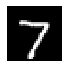

In [14]:
plt.figure(figsize=(1, 1))
# (28, 28, 1) -> (28, 28) for image
plt.imshow(x_test[0].reshape((28,28)), cmap='gray')
plt.grid(False)
plt.axis("off")
plt.show()

## ***File***

### *Save model*

In [0]:
model.save('my_cnn_model.hdf5')
# delete
del model

### *Load model*

In [16]:
from tensorflow.keras.models import load_model

model2 = load_model('my_cnn_model.hdf5')
print(model2.predict_classes(x_test[:1, :], verbose=0))

[7]


In [17]:
# chkeck a loaded mode
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_32 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv_64 (Conv2D)             (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv_128 (Conv2D)            (None, 7, 7, 128)         7

### *Tip*

- 로칼과의 다운로드과 업로드는 Colab의 왼편 창 Files brower를 이용하면 편리하다
- Colab과 내 구글드라이브('My Drive')를 연결시키고자 한다면 마운트한다

## ***실습과제***

### *과제1*

- #### *dropout과 batch normalization 관련 실험 필요*

### *과제2*

- #### *그외 verbose 같은 개발을 돕는 옵션들도 변경해보자*